In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_f20250362df648648ee81858c2a341b5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dkLHOXeBL-LhRRALaKACqdqFXWDlCd32BsfOndx1xFpy',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f20250362df648648ee81858c2a341b5.get_object(Bucket='chapter5project-donotdelete-pr-qisyarw87xisf5',Key='data_asset/Superstore.csv_shaped_fxFT7VnSTwyAKF8ZS4wY8g.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df_data_1.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df_data_1['Order Date'] = pd.to_datetime(df_data_1['Order Date'])


In [6]:
df_data_1.ftypes 

Row ID                    int64:dense
Order ID                 object:dense
Order Date       datetime64[ns]:dense
Ship Date                object:dense
Ship Mode                object:dense
Customer ID              object:dense
Customer Name            object:dense
Segment                  object:dense
Country                  object:dense
City                     object:dense
State                    object:dense
Postal Code               int64:dense
Region                   object:dense
Product ID               object:dense
Category                 object:dense
Sub-Category             object:dense
Product Name             object:dense
Sales                   float64:dense
Quantity                  int64:dense
Discount                float64:dense
Profit                  float64:dense
dtype: object

In [7]:
furniture = df_data_1.loc[df_data_1['Category'] == 'Furniture']

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture['Order Date']

0      2016-11-08
1      2016-11-08
3      2015-10-11
5      2014-06-09
10     2014-06-09
23     2017-07-16
24     2015-09-25
27     2015-09-17
29     2015-09-17
36     2016-12-08
38     2015-12-27
39     2015-12-27
51     2015-04-18
52     2015-04-18
57     2016-06-17
65     2015-11-24
66     2015-04-30
72     2015-04-26
73     2015-04-26
76     2017-12-09
78     2014-11-26
85     2017-05-28
93     2015-01-31
96     2017-11-09
104    2015-11-13
110    2017-12-25
117    2015-03-02
119    2016-06-12
124    2014-12-26
125    2014-09-20
          ...    
9854   2017-06-19
9857   2015-03-26
9865   2017-01-14
9868   2014-11-01
9879   2016-08-21
9893   2016-07-25
9894   2016-07-25
9897   2016-06-06
9898   2016-06-06
9899   2014-03-28
9901   2017-08-21
9903   2014-11-12
9905   2015-09-13
9907   2015-09-13
9908   2015-09-13
9909   2015-09-13
9912   2015-10-10
9917   2017-01-29
9919   2016-03-15
9928   2016-09-04
9931   2015-11-13
9937   2016-06-03
9938   2016-12-12
9947   2017-06-01
9955   201

In [10]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [11]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [13]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [14]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [15]:
y = furniture['Sales'].resample('MS').mean()

In [16]:
y["2017":]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

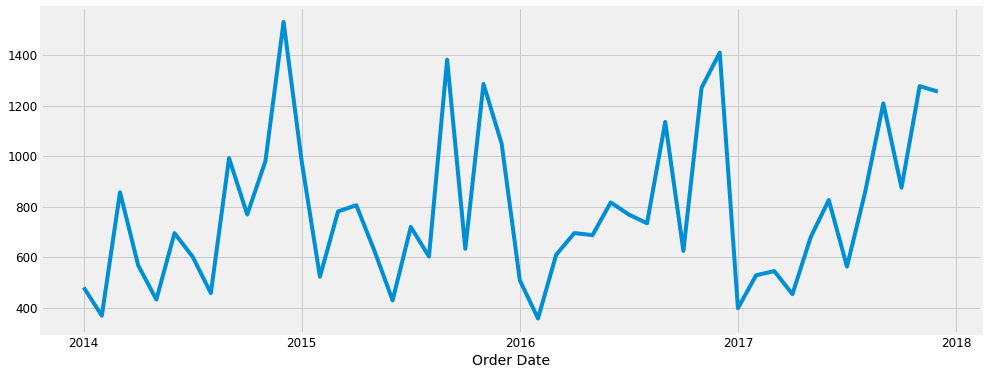

In [17]:
y.plot(figsize=(15, 6))
plt.show()

### Visualizing furniture sales time series data

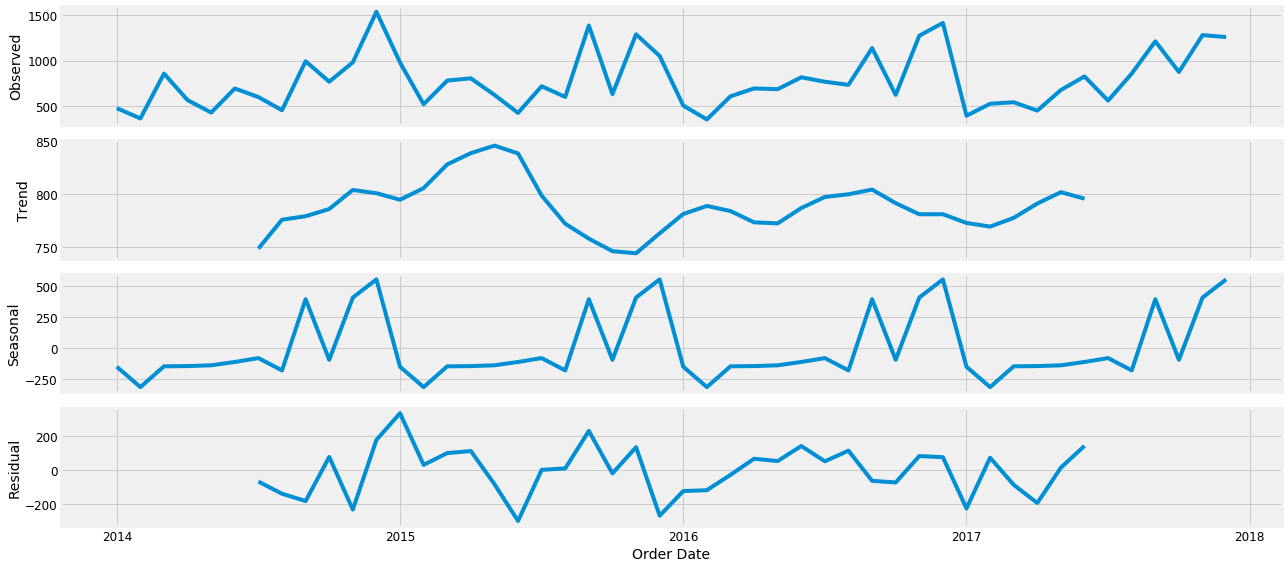

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1453.005671191094
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1243.6945372925434
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758114
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3007.0408786573994
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091266


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.52262865415685
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2565.7812190520945
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468646


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1377.3680280636083
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1646.6478872319972
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817257
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2577.6045731111903
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482733
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442746
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172994
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1108234787466935.2
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.925936793521


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1291.29250160813
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750846253
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218533
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2678.2308292320045
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814216
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323877046
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2541.449863287395
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021137544
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541903
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:537012197423717.44
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784239
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2093.9832970104667
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345443
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835324
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2637.6454284315064
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876107466
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607835
ARIM

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


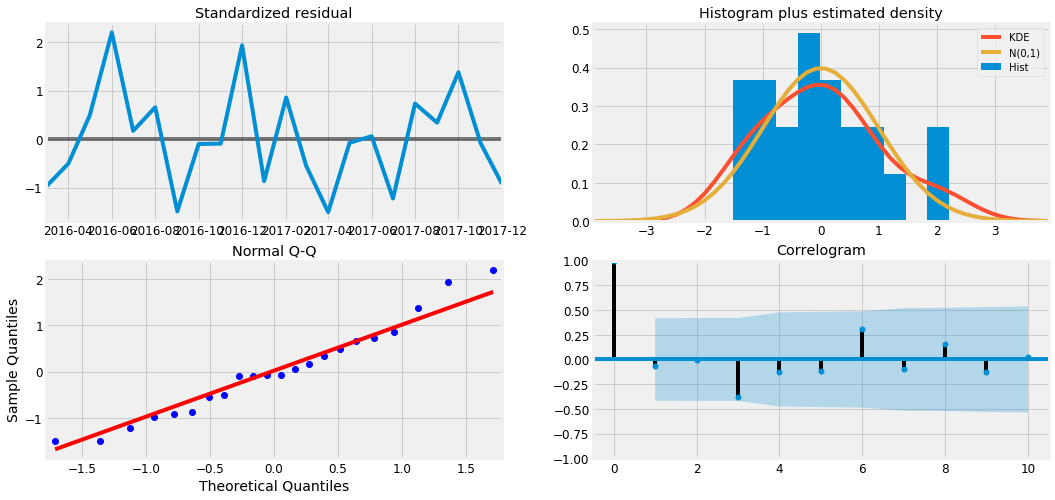

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

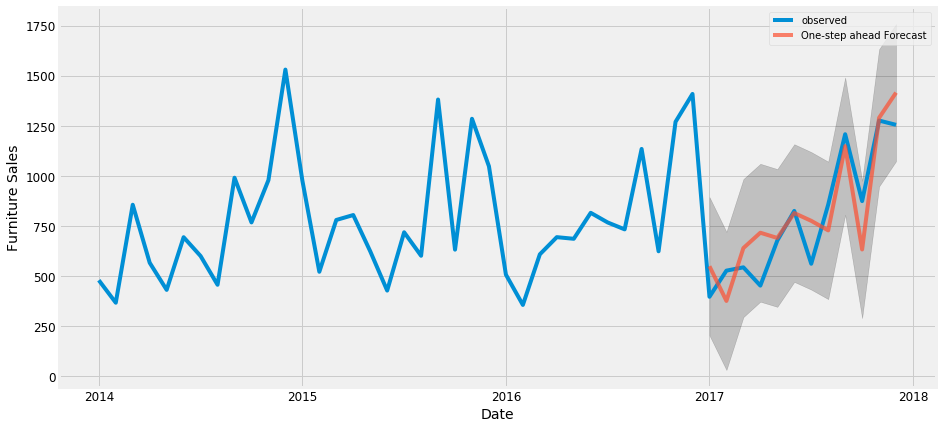

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

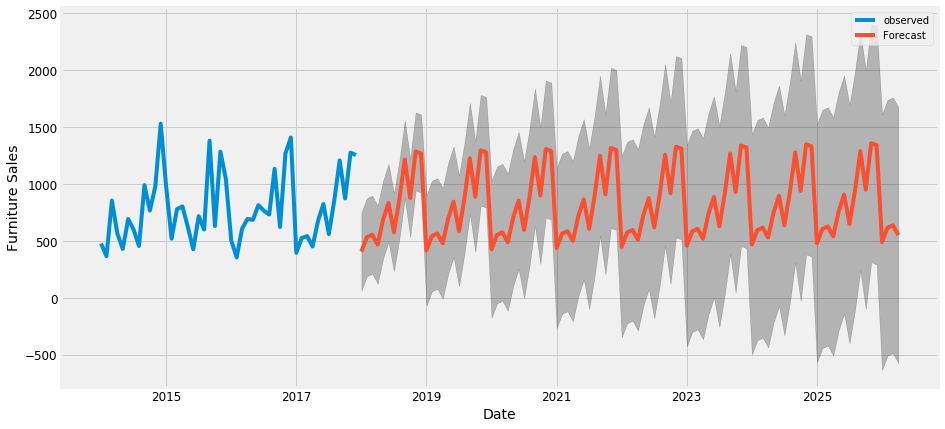

In [24]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()